# Group Assignment 1 - Zillow (San Fransisco)

In [1]:
# Import data and Plot

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
# Load the zillow dataset

zillow = pd.read_csv('zillow_housing_data.csv')

In [3]:
# Check the dataset

zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22515 entries, 0 to 22514
Columns: 284 entries, RegionID to 2022-12-31
dtypes: float64(276), int64(2), object(6)
memory usage: 48.8+ MB


In [4]:
# Show the first 5 rows of the dataset

zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253041.0,254862.0,...,754795.0,760368.0,766827.0,771961.0,775700.0,777962.0,779620.0,781589.0,782747.0,782365.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,...,958517.0,977905.0,995212.0,997168.0,997462.0,982958.0,971301.0,956808.0,953225.0,950715.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,108985.0,108995.0,...,256238.0,260901.0,265355.0,268695.0,270851.0,272191.0,272430.0,273037.0,273431.0,273295.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,164384.0,164777.0,...,305046.0,306378.0,309186.0,311339.0,312572.0,312253.0,312097.0,312197.0,312381.0,310452.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114772.0,114952.0,...,284072.0,289683.0,294718.0,297669.0,298737.0,299066.0,298893.0,298380.0,298942.0,297568.0


In [5]:
# Choose San Fransisco and save it as new dataframe

zillow_sf = zillow[(zillow['RegionName'] == 'San Francisco') & (zillow['RegionType'] == 'city')]

In [6]:
# Show the dataset

zillow_sf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
14,20330,14,San Francisco,city,CA,CA,"San Francisco-Oakland-Berkeley, CA",San Francisco County,449241.0,451985.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0


In [7]:
# Show the information of the new dataset

zillow_sf.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
25%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
50%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
75%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
max,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0


In [8]:
# Check is there null value

zillow_sf.isnull().values.any()

## False means there is no null or missing value in the dataset

False

In [9]:
# Transform the columns into rows

zillow_sf_trans = zillow_sf.transpose()

In [10]:
# Show the information of the new dataset

zillow_sf_trans.head(10)

,14
RegionID,20330
SizeRank,14
RegionName,San Francisco
RegionType,city
StateName,CA
State,CA
Metro,"San Francisco-Oakland-Berkeley, CA"
CountyName,San Francisco County
2000-01-31,449241.0
2000-02-29,451985.0


In [11]:
# Slice the dataframe only for date and price

zillow_sf_slice = zillow_sf_trans.iloc[8:,:]

In [12]:
# Show the new dataframe just to check

zillow_sf_slice.head()

,14
2000-01-31,449241.0
2000-02-29,451985.0
2000-03-31,455705.0
2000-04-30,463561.0
2000-05-31,472297.0


In [13]:
# Rename the columns

zillow_sf_slice.columns = ['Price']
df = pd.DataFrame(zillow_sf_slice, columns=['Price'])
df.head()

,Price
2000-01-31,449241.0
2000-02-29,451985.0
2000-03-31,455705.0
2000-04-30,463561.0
2000-05-31,472297.0


In [14]:
# Set the price values as integer

df['Price'] = df['Price'].astype(int)

In [15]:
# Check the data types

df.dtypes
print(df)

              Price
2000-01-31   449241
2000-02-29   451985
2000-03-31   455705
2000-04-30   463561
2000-05-31   472297
...             ...
2022-08-31  1521513
2022-09-30  1489008
2022-10-31  1466578
2022-11-30  1447627
2022-12-31  1438754

[276 rows x 1 columns]


Text(0, 0.5, 'Price')

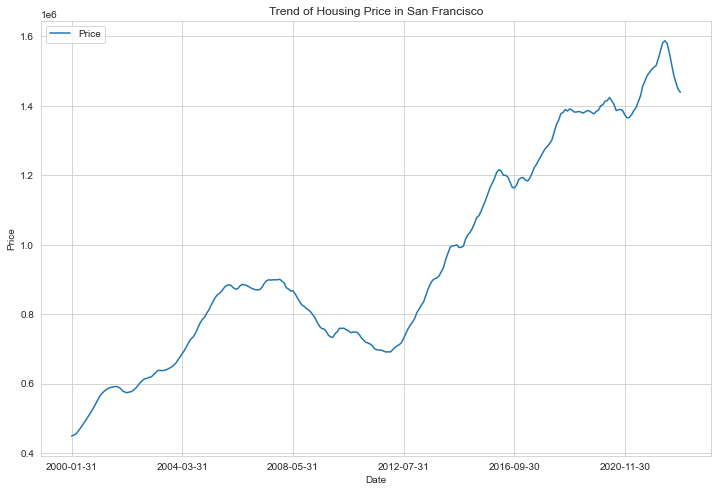

In [16]:
#Plot the trend of housing price

df.plot(figsize=(12,8))
plt.title("Trend of Housing Price in San Francisco")
plt.xlabel("Date")
plt.ylabel("Price")

In [17]:
#Calculate the average price for each year

df.index = pd.to_datetime(df.index)
grouped = df.groupby(df.index.year)
df_avg = grouped.mean().astype(int)
print(df_avg)

        Price
2000   489519
2001   581427
2002   593934
2003   639380
2004   723950
2005   845823
2006   878150
2007   891113
2008   849334
2009   762785
2010   750000
2011   704112
2012   733369
2013   869220
2014   990143
2015  1110211
2016  1191401
2017  1228509
2018  1359714
2019  1384197
2020  1396996
2021  1440931
2022  1522927


Text(0, 0.5, 'Price')

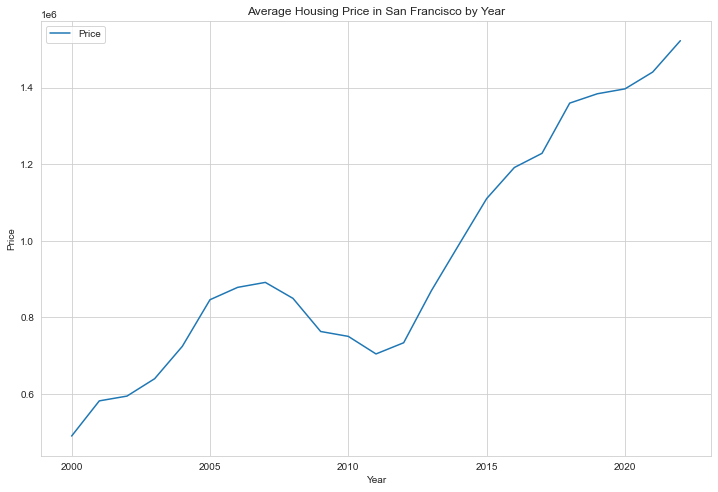

In [18]:
#Plot the average price for each year

df_avg.plot(figsize=(12,8))
plt.title("Average Housing Price in San Francisco by Year")
plt.xlabel("Year")
plt.ylabel("Price")

In [19]:
# Analyze the changes of average price per year, and add new column for %changes

df_avg['%_Change'] = (df_avg['Price'] / df_avg['Price'].shift(1) - 1) * 100
print(df_avg)

        Price   %_Change
2000   489519        NaN
2001   581427  18.775165
2002   593934   2.151087
2003   639380   7.651692
2004   723950  13.226876
2005   845823  16.834450
2006   878150   3.821958
2007   891113   1.476171
2008   849334  -4.688407
2009   762785 -10.190220
2010   750000  -1.676095
2011   704112  -6.118400
2012   733369   4.155163
2013   869220  18.524235
2014   990143  13.911668
2015  1110211  12.126329
2016  1191401   7.313024
2017  1228509   3.114652
2018  1359714  10.680019
2019  1384197   1.800599
2020  1396996   0.924652
2021  1440931   3.144962
2022  1522927   5.690488


Text(0, 0.5, 'Percentage Change')

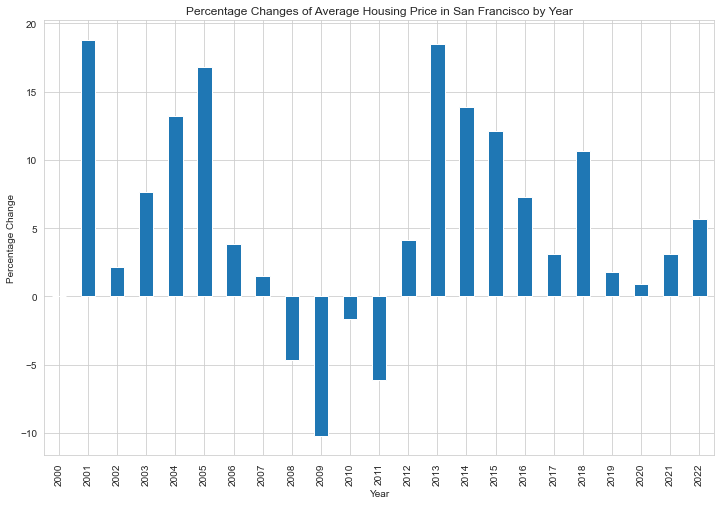

In [20]:
# Plot the changes of average price per year as bar graph

df_avg['%_Change'].plot(kind='bar', figsize=(12,8))
plt.title("Percentage Changes of Average Housing Price in San Francisco by Year")
plt.xlabel("Year")
plt.ylabel("Percentage Change")

In [21]:
# Rename the index to Year

df_avg.reset_index(inplace=True)
df_avg_copy = df_avg.rename(columns={'index': 'Year'})
print(df_avg_copy)

    Year    Price   %_Change
0   2000   489519        NaN
1   2001   581427  18.775165
2   2002   593934   2.151087
3   2003   639380   7.651692
4   2004   723950  13.226876
5   2005   845823  16.834450
6   2006   878150   3.821958
7   2007   891113   1.476171
8   2008   849334  -4.688407
9   2009   762785 -10.190220
10  2010   750000  -1.676095
11  2011   704112  -6.118400
12  2012   733369   4.155163
13  2013   869220  18.524235
14  2014   990143  13.911668
15  2015  1110211  12.126329
16  2016  1191401   7.313024
17  2017  1228509   3.114652
18  2018  1359714  10.680019
19  2019  1384197   1.800599
20  2020  1396996   0.924652
21  2021  1440931   3.144962
22  2022  1522927   5.690488


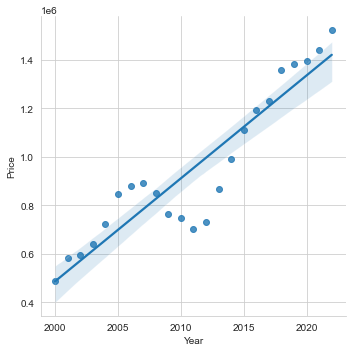

In [22]:
# Create a linear fit plot
sns.lmplot(x='Year',y='Price',data = df_avg_copy)

In [23]:
# Create a fitted model
lm = smf.ols(formula='Price ~ Year', data = df_avg_copy).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     125.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.61e-10
Time:                        00:32:53   Log-Likelihood:                -300.71
No. Observations:                  23   AIC:                             605.4
Df Residuals:                      21   BIC:                             607.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.441e+07   7.63e+06    -11.066      0.0

In [32]:
# Make the prediction for average housing price in San Francisco for year 2023

pred_2023 = lm.predict({'Year': [2023]})
pred_2023 = pred_2023.item()
pred_2023y = "${:,.3f}".format(pred_2023)
print("The predicted average housing price in San Francisco for year 2023 is", pred_2023y)

The predicted average housing price in San Francisco for year 2023 is $1,463,153.328
